In [1]:
# In this notebook:

# I look at characteristic changes of comic heroes over time;
# i.e. trends in gender, sexual orientation, death rate, etc.
# I utilize time series, data visualization and pivot tables

In [2]:
data_url = 'https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset#dc-wikia-data.csv'

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
morig = pd.read_csv('marvel-wikia-data.csv',header=0,index_col=None)
print(f'Marvel dataset shape is: {morig.shape}')

morig.head(3)

Marvel dataset shape is: (16376, 13)


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0


In [5]:
# visualize column datatypes
morig.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [6]:
# verify page_id is unique
morig['page_id'].is_unique

True

In [7]:
print(f"Column ID has {len(morig[morig['ID'].isnull()])} rows with NaN")
morig[morig['ID'].isnull()][:3]

Column ID has 3770 rows with NaN


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
467,2028,Arthur Parks (Earth-616),\/Arthur_Parks_(Earth-616),NaN,Bad Characters,Variable Eyes,Variable Hair,Male Characters,NaN,Living Characters,88.0,Nov-66,1966.0
536,65598,Kathryn Cushing (Earth-616),\/Kathryn_Cushing_(Earth-616),NaN,NaN,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,72.0,Nov-85,1985.0
573,2159,Calvin Rankin (Earth-616),\/Calvin_Rankin_(Earth-616),NaN,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,67.0,Apr-66,1966.0


In [8]:
morig['ID'].fillna(value='Other Identity', inplace=True)

morig[morig['ID'] == 'Other Identity'][:3]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
467,2028,Arthur Parks (Earth-616),\/Arthur_Parks_(Earth-616),Other Identity,Bad Characters,Variable Eyes,Variable Hair,Male Characters,NaN,Living Characters,88.0,Nov-66,1966.0
536,65598,Kathryn Cushing (Earth-616),\/Kathryn_Cushing_(Earth-616),Other Identity,NaN,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,72.0,Nov-85,1985.0
573,2159,Calvin Rankin (Earth-616),\/Calvin_Rankin_(Earth-616),Other Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,67.0,Apr-66,1966.0


In [9]:
# examining how stand-ins (i.e. Sam Wilson taking on the mantle of Cap) are handled
print(morig[morig['name'].str.contains('Samuel Wilson')].iloc[:, 1])

morig[morig['name'].str.contains('Captain America')]

68    Samuel Wilson (Earth-616)
Name: name, dtype: object


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
10719,89822,Number 5 (Captain America Comics) (Earth-616),\/Number_5_(Captain_America_Comics)_(Earth-616),Secret Identity,NaN,NaN,NaN,NaN,NaN,Living Characters,1.0,Mar-41,1941.0
11041,484940,Izan (Captain America Foe) (Earth-616),\/Izan_(Captain_America_Foe)_(Earth-616),Secret Identity,Bad Characters,NaN,Bald,Male Characters,NaN,Deceased Characters,1.0,Feb-43,1943.0
11197,495227,Hercules (Captain America Past Life) (Earth-616),\/Hercules_(Captain_America_Past_Life)_(Earth-...,Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1.0,May-44,1944.0
11874,669440,"Captain America (Impersonator, Sons of the Ser...","\/Captain_America_(Impersonator,_Sons_of_the_S...",Secret Identity,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,1.0,Oct-66,1966.0
13744,755271,Captain America (Taskmaster Robot) (Earth-616),\/Captain_America_(Taskmaster_Robot)_(Earth-616),Secret Identity,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,1.0,Oct-98,1998.0


In [10]:
# this is likely incomplete data, as well-known character like Namor & Proxima Midnight are missing info
print(f"Column Year has {len(morig[morig['Year'].isnull()])} rows with NaN")

Column Year has 815 rows with NaN


In [11]:
# though not ideal, will be dropping Year NaN to perform time series analysis
morig.dropna(subset=['Year'], inplace=True)
print(f'Dataset new shape is {morig.shape}')

Dataset new shape is (15561, 13)


## Prepare datetime

In [12]:
from datetime import datetime

In [13]:
def conv_datetime(x):
    return datetime.strptime(str(int(float(x))), '%Y')

In [14]:
morig['dt_year'] = morig['Year'].apply(conv_datetime)

morig.sort_values(['dt_year'], ascending=True, inplace=True)

morig.head(3)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,dt_year
15281,645438,Mr. Harris' Secretary (Earth-616),\/Mr._Harris%27_Secretary_(Earth-616),No Dual Identity,Neutral Characters,NaN,Blond Hair,Female Characters,NaN,Living Characters,NaN,Oct-39,1939.0,1939-01-01
60,1836,Human Torch (Android) (Earth-616),\/Human_Torch_(Android)_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,548.0,Oct-39,1939.0,1939-01-01
15282,331151,N'Jaga (Earth-616),\/N%27Jaga_(Earth-616),No Dual Identity,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,Oct-39,1939.0,1939-01-01


In [15]:
# we see that we only have partial data for last year
morig[morig['dt_year'] == '2013-01-01']['FIRST APPEARANCE'].unique()

array(['Mar-13', 'Jan-13', 'Feb-13', 'Apr-13', 'May-13', 'Jun-13'],
      dtype=object)

In [16]:
# remove 2013 due to incompleteness, i.e. misleading for trend
morig = morig[morig['dt_year'] < '2013-01-01']

morig.tail(3)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,dt_year
6889,594460,Gullveig (Earth-616),\/Gullveig_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,4.0,Oct-12,2012.0,2012-01-01
6883,584647,Dragoon (Earth-616),\/Dragoon_(Earth-616),Secret Identity,Good Characters,Red Eyes,NaN,Male Characters,NaN,Deceased Characters,4.0,Jul-12,2012.0,2012-01-01
6902,511164,Tolor (Earth-616),\/Tolor_(Earth-616),Secret Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,4.0,Feb-12,2012.0,2012-01-01


## Data visualization with pivot

In [17]:
from pandas import pivot_table

In [18]:
pv_all = pivot_table(morig,values='name',index=['dt_year'],aggfunc=len,fill_value=0)

print(f"1939 group has {len(morig[morig['dt_year'] == '1939-01-01'])} samples for verification")

pv_all.head(3)

1939 group has 69 samples for verification


,name
dt_year,
1939-01-01,69
1940-01-01,221
1941-01-01,207


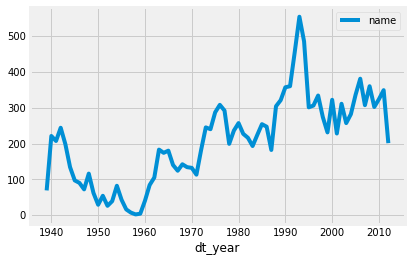

In [19]:
# overall comic hero count by creation year
pv_all.plot()

In [20]:
pv_gender = pivot_table(morig,values='name',index=['dt_year'],columns=['SEX'],aggfunc=len,fill_value=0)

pv_gender.head(3)

SEX,Agender Characters,Female Characters,Genderfluid Characters,Male Characters
dt_year,,,,
1939-01-01,0,10,0,56
1940-01-01,0,33,0,183
1941-01-01,0,15,0,180


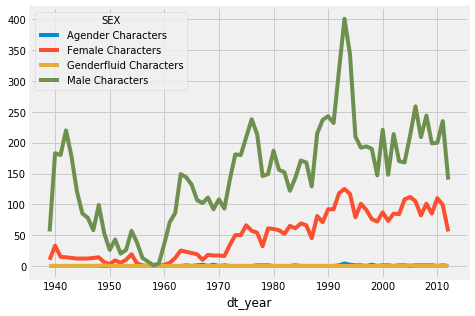

In [21]:
# plotting gender breakdown
pv_gender.plot(figsize=(7,5))

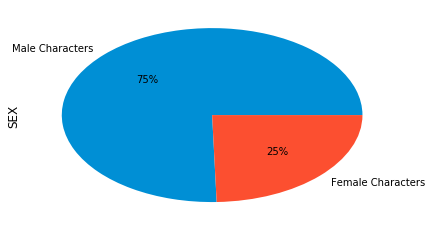

In [40]:
# Pie chart of sex; male vs female ratio 
morig['SEX'].value_counts()[:2].plot(kind='pie', autopct='%1.0f%%')

In [23]:
# counts of GSM categories
morig['GSM'].value_counts()

Homosexual Characters     58
Bisexual Characters       18
Transgender Characters     2
Transvestites              1
Pansexual Characters       1
Genderfluid Characters     1
Name: GSM, dtype: int64

In [24]:
# drop certain genders due to count too low to visualize
pv_gsm = pivot_table(morig,values='name',index=['dt_year'],columns=['GSM'],aggfunc=len,fill_value=0)

pv_gsm.drop(['Transgender Characters', 'Genderfluid Characters',
             'Transvestites', 'Pansexual Characters'],
             axis=1, inplace=True)

pv_gsm.head(3)

GSM,Bisexual Characters,Homosexual Characters
dt_year,,
1940-01-01,0,1
1943-01-01,0,1
1948-01-01,0,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000269303E6A20>,
      dtype=object)

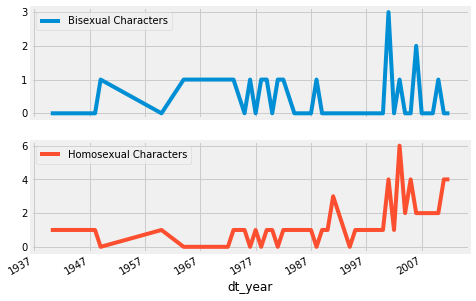

In [25]:
# we see an increase of homosexual and bisexual characters in the early 2000s
pv_gsm.plot(figsize=(7,5),kind='line',subplots=True)

In [26]:
pv_align = pivot_table(morig,values='name',index=['dt_year'],columns=['ALIGN'],aggfunc=len,fill_value=0)

pv_align.head(3)

ALIGN,Bad Characters,Good Characters,Neutral Characters
dt_year,,,
1939-01-01,31,21,17
1940-01-01,92,118,8
1941-01-01,119,62,7


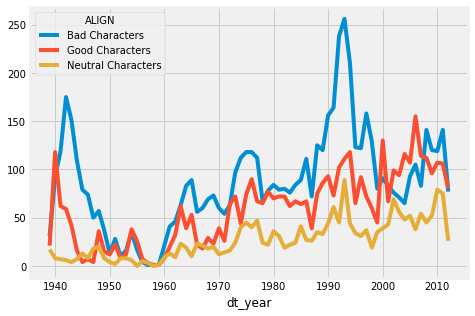

In [27]:
# we see an interesting spike in villians in the early 90s
pv_align.plot(figsize=(7,5))

In [28]:
# find year with most bad characters created
pv_align[pv_align['Bad Characters'] == pv_align['Bad Characters'].max()]

ALIGN,Bad Characters,Good Characters,Neutral Characters
dt_year,,,
1993-01-01,256,111,89


In [29]:
# quick look at villains from 1993
morig[(morig['dt_year'] == '1993-01-01') & (morig['ALIGN'] == 'Bad Characters')][:5]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,dt_year
7643,254262,Jean DeZoan (Earth-616),\/Jean_DeZoan_(Earth-616),Other Identity,Bad Characters,NaN,Brown Hair,Male Characters,NaN,Living Characters,3.0,Mar-93,1993.0,1993-01-01
7644,250549,Johann Bessler (Earth-616),\/Johann_Bessler_(Earth-616),Secret Identity,Bad Characters,Red Eyes,NaN,Male Characters,NaN,Living Characters,3.0,May-93,1993.0,1993-01-01
7645,120836,Katherine Ainsley-Jones (Earth-616),\/Katherine_Ainsley-Jones_(Earth-616),Other Identity,Bad Characters,NaN,Black Hair,Female Characters,NaN,Living Characters,3.0,Sep-93,1993.0,1993-01-01
7640,557920,Genkotsu (Earth-616),\/Genkotsu_(Earth-616),Secret Identity,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,3.0,Oct-93,1993.0,1993-01-01
2502,2505,Tyrant (Earth-616),\/Tyrant_(Earth-616),Secret Identity,Bad Characters,Red Eyes,No Hair,Male Characters,NaN,Deceased Characters,14.0,Jun-93,1993.0,1993-01-01


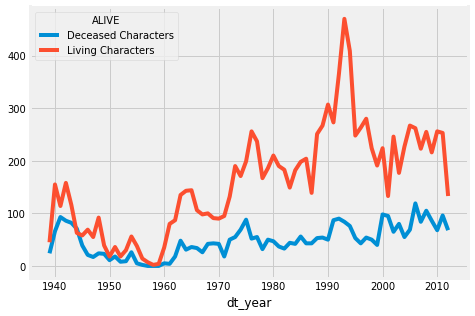

In [30]:
# plotting living versus deceased characters
# this doesn't tell us much; maybe percentage will be more informative
pv_alive = pivot_table(morig,values='name',index=['dt_year'],columns=['ALIVE'],aggfunc=len,fill_value=0)

pv_alive.plot(figsize=(7,5))

In [31]:
pv_deceased = pivot_table(morig,values='name',index=['dt_year'],columns=['ALIVE'],aggfunc=len,margins=True,fill_value=0)
pv_deceased = pv_deceased.div(pv_deceased.iloc[:,-1], axis=0)
pv_deceased = pv_deceased.iloc[:-1,:1]

pv_deceased.head(3)

ALIVE,Deceased Characters
dt_year,
1939-01-01 00:00:00,0.347826
1940-01-01 00:00:00,0.298643
1941-01-01 00:00:00,0.449275


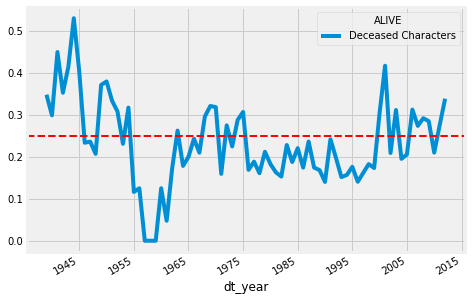

In [57]:
# we see higher deceased ratio for around 1945 and around 2001
# 25% line for reference
pv_deceased.plot(figsize=(7,5))
plt.axhline(0.25, color='r', linestyle='--', lw=2)

In [33]:
pv_deceased[pv_deceased['Deceased Characters'] == pv_deceased['Deceased Characters'].max()]

ALIVE,Deceased Characters
dt_year,
1944-01-01 00:00:00,0.529851


In [34]:
# Interestingly all deceased characters created in 1944 are bad characters
morig[(morig['dt_year'] == '1944-01-01') & (morig['ALIVE'] == 'Deceased Characters')]['ALIGN'].value_counts()

Bad Characters    71
Name: ALIGN, dtype: int64

In [35]:
# to double check the finding above
morig[(morig['dt_year'] == '1944-01-01') & (morig['ALIGN'] == 'Good Characters')]['ALIVE'].value_counts()

Living Characters    16
Name: ALIVE, dtype: int64

In [36]:
morig['ID'].value_counts()

Secret Identity                  5904
Public Identity                  4329
Other Identity                   3574
No Dual Identity                 1572
Known to Authorities Identity      15
Name: ID, dtype: int64

In [37]:
pv_id = pivot_table(morig,values='name',index=['dt_year'],columns=['ID'],aggfunc=len,margins=True,fill_value=0)
pv_id = pv_id.div(pv_id.iloc[:,-1], axis=0)
pv_id.drop(['Known to Authorities Identity', 'All'], axis=1, inplace=True)
pv_id = pv_id.iloc[:-1]

pv_id.head(3)

ID,No Dual Identity,Other Identity,Public Identity,Secret Identity
dt_year,,,,
1939-01-01 00:00:00,0.797101,0.115942,0.043478,0.043478
1940-01-01 00:00:00,0.162896,0.104072,0.466063,0.266968
1941-01-01 00:00:00,0.062802,0.144928,0.376812,0.415459


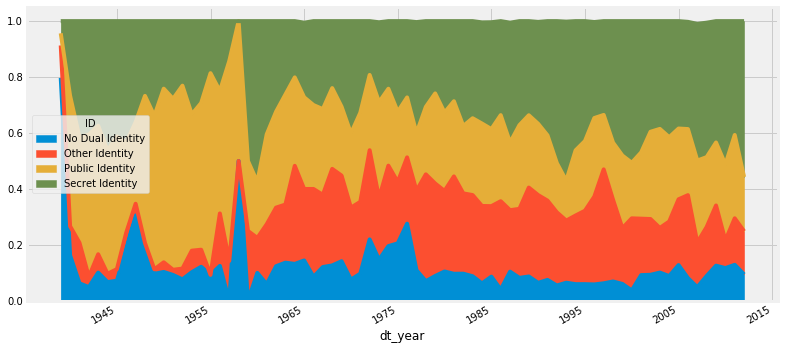

In [38]:
# looking at the breakdown of identity
pv_id.plot(figsize=(12,6), kind='area')

In [ ]:
# this concludes pt 01; in pt 02 I compare Marvel and DC characters